In [1]:
import ipywidgets as widgets
from traitlets import Unicode, validate

In [25]:
class HelloWidget(widgets.DOMWidget):
    _view_name = Unicode('HelloView').tag(sync=True)
    _view_module = Unicode('hello').tag(sync=True)
    _view_module_version = Unicode('0.1.0').tag(sync=True)

In [26]:
%%javascript
require.undef('hello');

define('hello', ["@jupyter-widgets/base"], function(widgets) {

    var HelloView = widgets.DOMWidgetView.extend({

        render: function() {
            this.value_changed();
            this.model.on('change:value', this.value_changed, this);
        },

        value_changed: function() {
            this.el.textContent = this.model.get('value');
        },
    });

    return {
        HelloView: HelloView
    };
});

<IPython.core.display.Javascript object>

In [27]:
w = HelloWidget()

In [33]:
w.value

'ye'

In [32]:
w.value = "ye"

In [37]:
from ipywidgets import DOMWidget
from traitlets import Unicode, Int

class MyWidget(DOMWidget):
    _view_module = Unicode('mywidget').tag(sync=True)
    _view_module_version = Unicode('0.1.0').tag(sync=True)
    _view_name = Unicode('MyWidgetView').tag(sync=True)
    count = Int().tag(sync=True)

In [45]:
%%javascript
define('mywidget', ['@jupyter-widgets/base'], function(widgets) {
    var MyWidgetView = widgets.DOMWidgetView.extend({
        render: function() {
            MyWidgetView.__super__.render.apply(this, arguments);
            this._count_changed();
            this.listenTo(this.model, 'change:count', this._count_changed, this);
        },

        _count_changed: function() {
            var old_value = this.model.previous('count');
            var new_value = this.model.get('count');
            this.el.textContent = String(old_value) + ' -> ' + String(new_value);
        }
    });

    return {
        MyWidgetView: MyWidgetView
    }
});

<IPython.core.display.Javascript object>

In [46]:
my = MyWidget()

In [48]:
my

MyWidget(count=2)

In [51]:
my.count = 6

In [50]:
my

MyWidget(count=5)

In [7]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

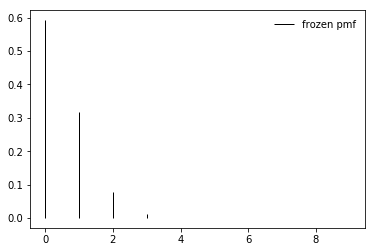

In [13]:
n=10
p=0.051
fig, ax = plt.subplots(1, 1)
x = np.arange(0,10)
rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

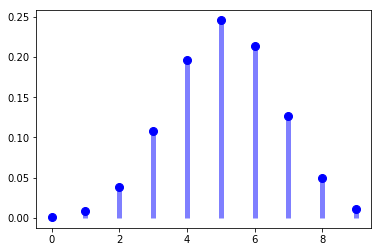

In [20]:
n=10
p=0.51
fig, ax = plt.subplots(1, 1)
x = np.arange(0,10)
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

In [21]:
binom.rvs(n,p,1)

7

In [16]:
rv